                                inventor               inventorLabel  \
0  http://www.wikidata.org/entity/Q57384           Wernher von Braun   
1  http://www.wikidata.org/entity/Q45440  Albrecht Ludwig Berblinger   
2  http://www.wikidata.org/entity/Q62377        Carl Wilhelm Siemens   
3  http://www.wikidata.org/entity/Q60677   Charles Proteus Steinmetz   
4  http://www.wikidata.org/entity/Q60677   Charles Proteus Steinmetz   

  genderLabel                                 countryLabel  
0    masculin                              Empire allemand  
1    masculin                          duché de Wurtemberg  
2    masculin  Royaume-Uni de Grande-Bretagne et d'Irlande  
3    masculin                                   États-Unis  
4    masculin                                    Allemagne  

Tableau de contingence :
genderLabel                       femme trans  féminin  masculin  non-binarité
countryLabel                                                                  
Afghanistan      

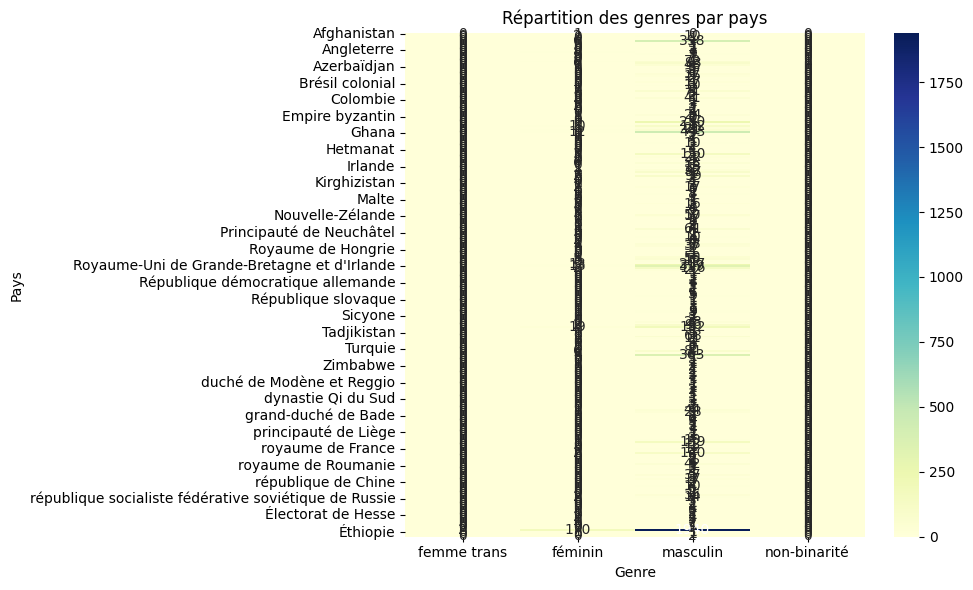

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

# Charger les données depuis le fichier CSV exporté de Wikidata
df = pd.read_csv("../data/inventors_gender_country.csv")

# Afficher les premières lignes pour vérifier le contenu
print(df.head())

# Supprimer les lignes avec données manquantes si besoin
df = df.dropna(subset=['genderLabel', 'countryLabel'])

# Créer le tableau de contingence : pays x genre
contingency = pd.crosstab(df['countryLabel'], df['genderLabel'])

# Affichage du tableau
print("\nTableau de contingence :")
print(contingency)

# Test du Chi²
chi2, p, dof, expected = chi2_contingency(contingency)

print(f"\nStatistique de Chi² : {chi2:.2f}")
print(f"Degrés de liberté : {dof}")
print(f"p-value : {p:.4f}")

if p < 0.05:
    print("✅ Il existe une dépendance significative entre genre et pays.")
else:
    print("❌ Pas de dépendance significative détectée.")

# Affichage de la heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(contingency, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Répartition des genres par pays")
plt.xlabel("Genre")
plt.ylabel("Pays")
plt.tight_layout()
plt.show()
